# Eaton and Palisades Fires Analysis and Accompanying Analyses

#### Author: Austin Martinez  
#### GitHub Repository: https://github.com/austinmartinez12/eds220-hwk4


## About Section

#### Purpose: 
The first part of this project focused on visualizing the extent of the Palisades and Eaton fires and how  socioeconomic factors, like the percentage of unemployed residents, may shape a community’s ability to respond to a wildfire. The second part of this project was to use false-color Landsat 8 imagery to visualize the extent of Palisades and Eaton fire perimeters around the LA County area. False-color was used to enhance burn severity and vegetation patterns in the background image. The false-color composite was made up of SWIR, NIR, and Red bands.

#### Highlights: 
##### Social dimensions of Eaton and Palisades fires
- Reprojected the CRS of Eaton and Palisades shapefiles to match the EJI's CRS.
- Used geopandas.sjoin() to identify EJI census tracts intersecting each fire perimeter
- Used clipping to clip the census tracts within the fire perimeters
- Visualized unemployment levels in both fire perimeters to see if it could influence a community’s response to a wildfire

##### Visualizing Fire Scares Through False Color
- Created a false-color image using using SWIR, NIR, and Red bands from the Landsat 8 raster.
- Reprojected the CRS of Eaton and Palisades shapefiles to match the Landsat 8 raster's CRS.
- Replaced NaNs in the Landsat 8 raster's bands with 0s.
- Plotted the Eaton and Palisades perimeters onto the false-color image.
- Visualized unemployment levels (E_UNEMP) for both fire areas

#### About the data:

- **Eaton_Perimeter_20250121.shp:** Dissolved fire perimeter/boundary of the Eaton Fire that took place during January 2025. It was collected by the NIFC FIRIS program.
- **Palisades_Perimeter_20250121.shp:** Dissolved fire perimeter/boundary of the Palisades Fire that took place during January 2025. It was collected by the NIFC FIRIS program.
- **landsat8-2025-02-23-palisades-eaton.nc:** This dataset is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmospherically corrected surface reflectance data, collected by the Landsat 8 satellite.
- **EJI_2024_United_States.gdb:** This Geodatabase contains 2024 Environmental Justice Index (EJI) data for the United States. This includes census-tract–level indicators, component scores, and overall EJI scores derived from environmental, health, and socioeconomic variables. It was collected by the CDC/ATSDR, in partnership with the U.S. Census Bureau.

#### References: 

- 1. County of Los Angeles. (2025). Palisades and Eaton dissolved fire perimeters (2025) [Feature layer]. ArcGIS Hub. https://services1.arcgis.com/jUJYIo9tSA7EHvfZ/ArcGIS/rest/services/CA_Perimeters_NIFC_FIRIS_public_view/FeatureServer. [Accessed Nov. 20, 2025]
- 2. U.S. Geological Survey. (2025). Landsat Collection 2 Level-2 surface reflectance (red, green, blue, near-infrared, shortwave infrared) for Eaton and Palisades fires, Los Angeles County, CA [NetCDF dataset]. Microsoft Planetary Computer. https://planetarycomputer.microsoft.com/. [Accessed Nov. 20, 2025]
- 3. Centers for Disease Control and Prevention & Agency for Toxic Substances and Disease Registry. (2024). Environmental Justice Index 2024: United States geodatabase [Data set]. GRASP Program. https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html [Accessed Nov. 20, 2025]

### Reading in Data

In the code 3 code chunks are for importing the libraries necessary for running this notebook. Reproducible file path were created using os, these file path were used to read in the shapefiles, geodatabase, and raster. The 4 datasets were named Eaton(Eaton shapefile), Palisades(Palisades shapefile), EJI(EJI geodatabase), and Landsat_8(Landsat 8 raster).

In [176]:
# Load in Libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rio
import matplotlib.pyplot as plt
import contextily as ctx

In [177]:
# Create a reproducible file path
Eaton_fp = os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp')
Palisades_fp = os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp')
EJ_fp = os.path.join("data", "EJI_2024_United_States", "EJI_2024_United_States.gdb")
NC_fp = os.path.join('data','landsat8-2025-02-23-palisades-eaton.nc')

In [178]:
# Read in data
Eaton = gpd.read_file(Eaton_fp)
Palisades = gpd.read_file(Palisades_fp)
EJI = gpd.read_file(EJ_fp)
Landsat_8 = xr.open_dataset(NC_fp)

## Social dimensions of Eaton and Palisades fires

### Metadata exploration

I selected a variable that, in my opinion, could influence a community’s response to a wildfire from EJI.
- E_UNEMP - Percentage of persons who are unemployed

### Polygon intersection

The next 3 code chunks are used to spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

In [179]:
# Transform the CRS of Palisades to match the CRS of EJI
Palisades = Palisades.to_crs(EJI.crs)

# Verify CRSs match 
print(f" Palisades and EJI CRSs match: {Palisades.crs == EJI.crs}")

 Palisades and EJI CRSs match: True


In [180]:
# Spatially join the EJI data with the Palisades fire perimeter
PE_data = gpd.sjoin(EJI, Palisades)

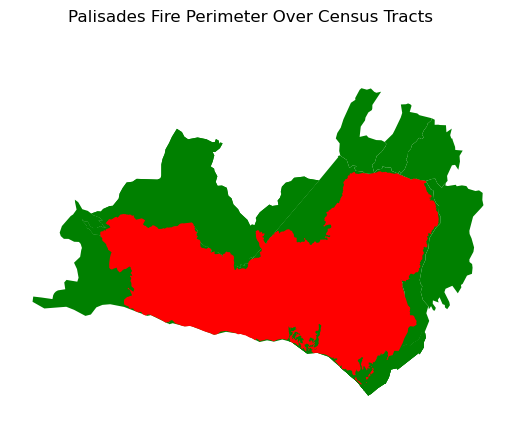

In [181]:
# Plot the census tracts that intersect the Palisades fire perimeter
fig, ax = plt.subplots()
PE_data.plot(ax=ax, color='green')
Palisades.plot(ax=ax, color = "red")
fig.suptitle('Palisades Fire Perimeter Over Census Tracts')
ax.axis('off')
plt.show()

The next 3 code chunks are used to spatially join the EJI data with the Eaton fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Eaton fire perimeter.

In [182]:
# Transform the CRS of Eaton to match the CRS of EJI
Eaton = Eaton.to_crs(EJI.crs)

# Verify CRSs match 
print(f" Eaton and EJI CRSs match: {Eaton.crs == EJI.crs}")

 Eaton and EJI CRSs match: True


In [183]:
# Spatially join the EJI data with the Palisades fire perimeter
EE_data = gpd.sjoin(EJI, Eaton)

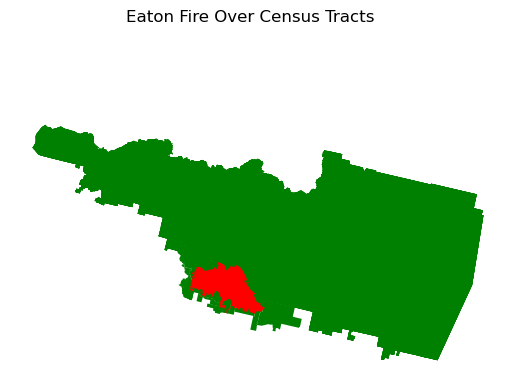

In [184]:
# Plot the census tracts that intersect the Eaton fire perimeter
fig, ax = plt.subplots()
EE_data.plot(ax=ax, color='green')
Eaton.plot(ax=ax, color = "red")
fig.suptitle('Eaton Fire Over Census Tracts')
ax.axis('off')
plt.show()

### Polygon clipping

The next 2 code chunks are used to clip the census tracts to the Palisades and Eaton Fires perimeter using geopandas.clip(). The clipped census tracts(`Palisades_fire`, `Eaton_fire`) were then plotted ontop of the fires perimeters to show they are the same shape.

In [185]:
# Clip the census tracts to the Palisades and Eaton Fires perimeter
Eaton_fire = gpd.clip(EE_data, Eaton)
Palisades_fire = gpd.clip(PE_data, Palisades)

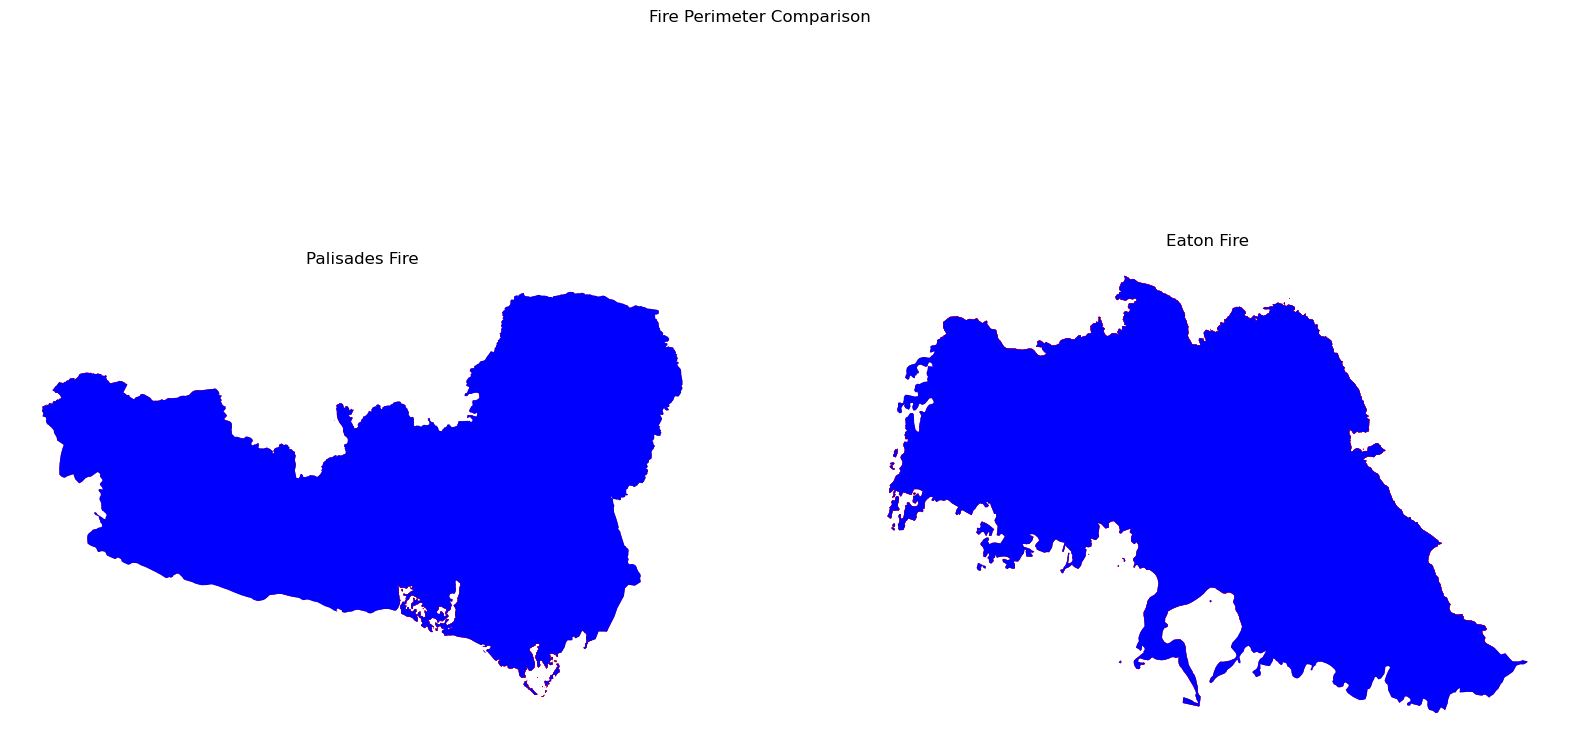

In [186]:
# Plot the clipped census tracts over the fires perimeters to show they are the same shape
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Palisades fire perimeter
Palisades_fire.plot(ax=ax1, color='red')
Palisades.plot(ax=ax1, color='blue')
ax1.set_title('Palisades Fire')
ax1.axis('off')

# Eaton fire perimeter
Eaton_fire.plot(ax=ax2, color='red')
Eaton.plot(ax=ax2, color='blue')
ax2.set_title('Eaton Fire')
ax2.axis('off')

# Title
fig.suptitle('Fire Perimeter Comparison')

plt.show()


### Visualize fire perimeters with a basemap

The code chunk below is used to visualize fire perimeters with a basemap. This was done by adding a basemap to the plot using the contextily library.

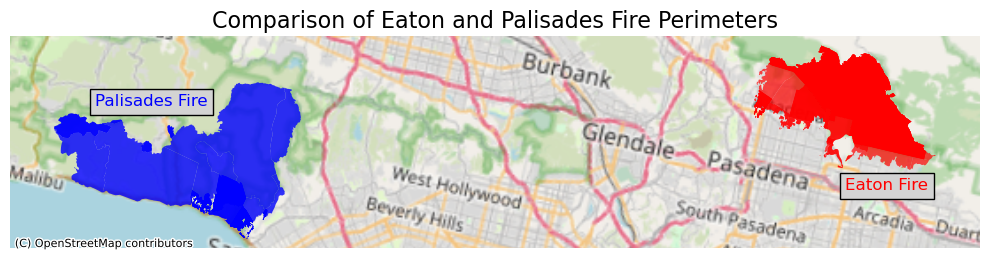

In [187]:
# Plot the fire perimeters with a basemap
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Eaton fire perimeter
Eaton_fire.plot(ax=ax, color='red', alpha=0.7, label='Eaton Fire')

# Palisades fire perimeter
Palisades_fire.plot(ax=ax, color='blue', alpha=0.8, label='Palisades Fire')

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,crs=Palisades_fire.crs)

# Add title
ax.set_title("Comparison of Eaton and Palisades Fire Perimeters", fontsize=16)

# Add labels with gray background
plt.figtext(0.10, 0.53, "Palisades Fire", color='blue', fontsize=12, bbox=dict(facecolor='lightgray'))
plt.figtext(0.85, 0.46, "Eaton Fire", color='red', fontsize=12, bbox=dict(facecolor='lightgray'))

# Remove axis
ax.axis('off')

# Display the map
plt.tight_layout()
plt.show()


### Visualize EJI data
The code chunk below was used to plot a given variable(`E_UNEMP`)that was relevant to a community’s response to a wildfire.

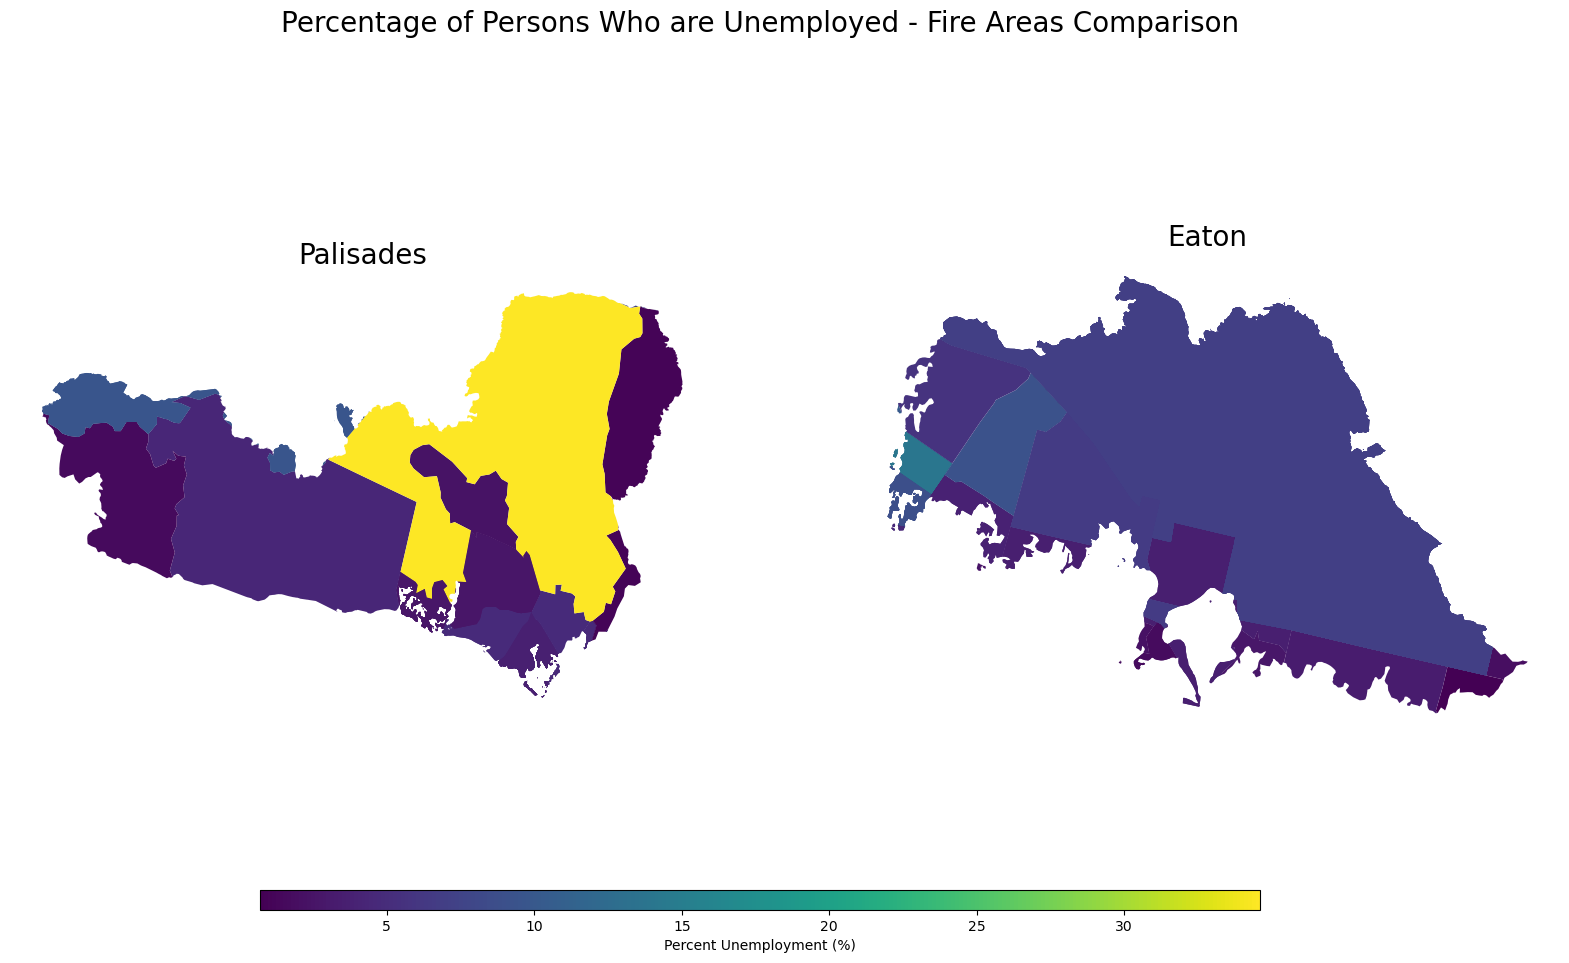

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Insert EJI variable to visualize
eji_variable = 'E_UNEMP'

# Find common min/max for legend range
vmin = min(Palisades_fire[eji_variable].min(), Eaton_fire[eji_variable].min())
vmax = max(Palisades_fire[eji_variable].max(), Eaton_fire[eji_variable].max())

# Plot census tracts within Palisades perimeter
Palisades_fire.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades', fontsize=20)
ax1.axis('off')

# Plot census tracts within Eaton perimeter
Eaton_fire.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton', fontsize=20)
ax2.axis('off')

# Add overall title
fig.suptitle('Percentage of Persons Who are Unemployed - Fire Areas Comparison', fontsize=20)

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percent Unemployment (%)')

# Display the map
plt.show()

## Visualizing Fire Scares Through False Color

### Fire perimeter data exploration

In [189]:
# Check if data are projected or geographic
print(f"The CRS of Eaton is projected: {Eaton.crs.is_projected}")
print(f"The CRS of Palisades is projected: {Palisades.crs.is_projected}", "\n")

# Verify CRSs match 
print(f" Palisades and Eaton columns match: {Palisades.columns == Eaton.columns}")

The CRS of Eaton is projected: True
The CRS of Palisades is projected: True 

 Palisades and Eaton columns match: [ True  True  True  True  True]


### Restoring geospatial 

The 5 code chunks below are used to clean the data, so that a true color image can be created from landsat_8.

In the code chunk below, the crs for Landsat_8 is stored in the spatial_ref variable. To recover the geospatial information from it rio.write_crs() was used. rio.crs can now be used to access the CRS of landsat_8.

In [190]:
# Print the CRS by using the spatial_ref.crs_wkt attribute
print(f"Landsat_8 CRS: {Landsat_8.spatial_ref.crs_wkt}","\n")

# Recover the geospatial information by using rio.write_crs()
Landsat_8.rio.write_crs(Landsat_8.spatial_ref.crs_wkt, inplace=True)

# Print the CRS of the updated dataset
print("Updated CRS:", Landsat_8.rio.crs)

Landsat_8 CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]] 

Updated CRS: EPSG:32611


### True color image

#### Data Cleaning and Visualization - True-color

In the code chunk below, the red, green, and blue variables (in that order) of the xarray.Dataset were selected and were converted to an array using the to_array() method. The array was then plotted using .plot.imshow() to create an RGB image with the data. Unfortunately, no image was produced because of the clouds: their RGB values are outliers and cause the other values to be squished when plotting. The parameter robust=True was used to adjust the scale used for plotting the bands to get a true color image.

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


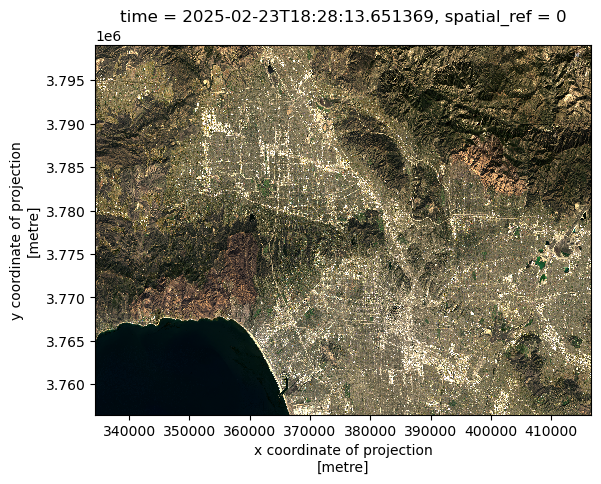

In [191]:
# Select the red, green, and blue variables of the xarray.Dataset holding the Landsat data
# Use .plot.imshow() to create an RGB image with the data
Landsat_8[["red", "green", "blue"]].to_array().plot.imshow(robust=True)

In the nect 2 code chunks below, to resolve the warning the bands with nan values were identified using a for loop and .fillna() was used to replace the nan values with 0s. The bands blue and green had nans. Once, the nans were replaced with 0s the warning was resolved.

In [192]:
# Select "red", "green", "blue" bands
bands = ["red", "green", "blue"]

# Check for nans in each band
for band in bands:
    has_nan = np.isnan(Landsat_8[band].values).any()
    print(f"{band} contains NaN values? {has_nan}")

red contains NaN values? False
green contains NaN values? True
blue contains NaN values? True


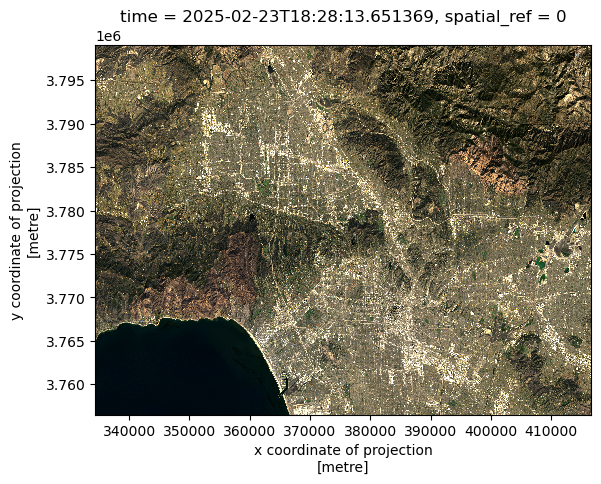

In [193]:
# Fill NaNs with 0 to avoid casting issues
Landsat_8[["green", "blue"]] = Landsat_8[["green", "blue"]].fillna(0)

# Plot RGB raster
Landsat_8[["red", "green", "blue"]].to_array().plot.imshow(robust=True)

### False color image

#### Data Cleaning and Visualization - True-color

The code chunk below created a false-color image by using the "swir22", "nir08", and "red" bands. This was plotted using the same method used with the true color image.

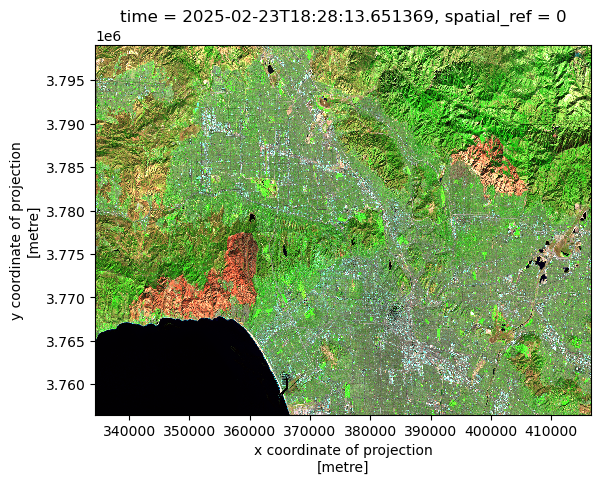

In [194]:
# Use .plot.imshow() to create a false color image with the data
Landsat_8[["swir22", "nir08", "red"]].to_array().plot.imshow(robust=True)

### False-color map with fire parimeters

In the code chunk below, the CRS of Eaton and Palisades was reprojected to match the Landsat_8 CRS. This was done so we can plot the Eaton and Palisades perimeters onto the false-color image. A for loop was then used to identify that the "swir22", "nir08" had nan values. To resolve this .fillna(0) was used to replace the nan values with 0s.

In [195]:
# Change the CRS of Palisades and Eaton to match Landsat_8
Palisades = Palisades.to_crs(Landsat_8.rio.crs)
Eaton = Eaton.to_crs(Landsat_8.rio.crs)

# Verify the CRS of Palisades and Eaton to match Landsat_8
print(f" Palisades and Landsat_8 CRSs match: {Palisades.crs == Landsat_8.rio.crs}")
print(f" Eaton and Landsat_8 CRSs match: {Eaton.crs == Landsat_8.rio.crs}", "\n")

# Select "swir22", "nir08" bands
bands = ["swir22", "nir08"]

# Check for nans in each band
for band in bands:
    has_nan = np.isnan(Landsat_8[band].values).any()
    print(f"{band} contains NaN values? {has_nan}")

# Fill NaNs with 0 to avoid casting issues
Landsat_8[["swir22", "nir08"]] = Landsat_8[["swir22", "nir08"]].fillna(0)

 Palisades and Landsat_8 CRSs match: True
 Eaton and Landsat_8 CRSs match: True 

swir22 contains NaN values? False
nir08 contains NaN values? False


The code chunk below is used to plot the Eaton and Palisades perimeters onto the false-color image.

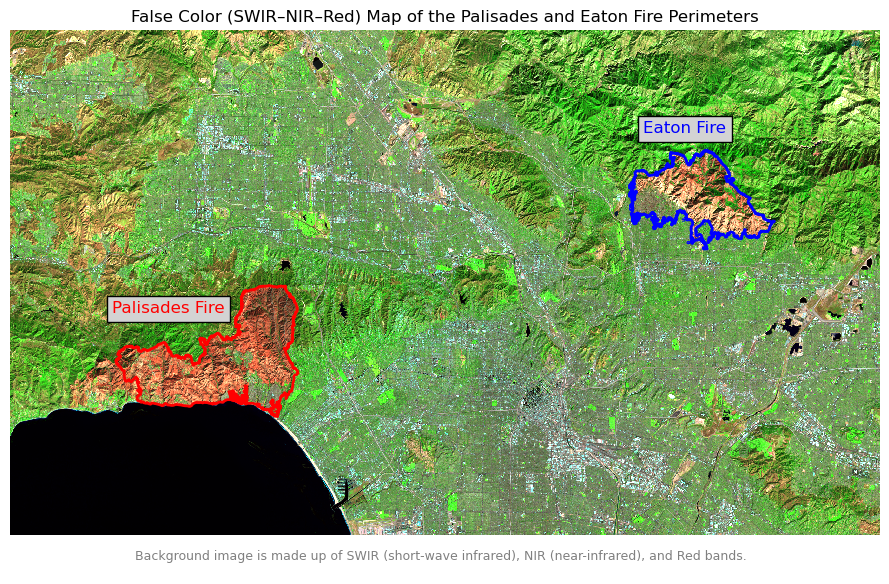

In [196]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Add Palisades and Eaton fire perimeters
Palisades.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
Eaton.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2,legend=True)

# Add false color raster
Landsat_8[["swir22", "nir08", "red"]].to_array().plot.imshow(robust=True)

# Add title
ax.set_title('False Color (SWIR–NIR–Red) Map of the Palisades and Eaton Fire Perimeters')

## # Add annotation describing the false color
plt.annotate(
    'Background image is made up of SWIR (short-wave infrared), NIR (near-infrared), and Red bands.',
    xy=(0.15, 0.04),
    xycoords='figure fraction',
    fontsize=9,
    color='gray'
)

# Add labels with gray background
plt.figtext(0.13, 0.47, "Palisades Fire", color='red', fontsize=12, bbox=dict(facecolor='lightgray'))
plt.figtext(0.72, 0.77, "Eaton Fire", color='blue', fontsize=12, bbox=dict(facecolor='lightgray'))

# Remove axes
ax.axis('off')

# Display the map
plt.tight_layout()
plt.show()

##### Map Description:
The map above shows a false color image of the LA County area, displaying the perimeter of fires that occured in the Palisades(in red) and Eaton(in blue). False color imagery is being used in the background image. The background image is made up of SWIR (short-wave infrared), NIR (near-infrared), and Red bands. These bands are used to enhance burn severity and vegetation patterns. The false colors in this background image show healthy vegetation as bright green, urban areas as cyan/gray, and burnt area areas as a reddish brown.